# 数据科学与工程导论实验报告-10 11
温兆和 10205501432

首先我们引入在本次实验中需要用到的Python库。

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv
import pymysql
db = pymysql.connect(host = "cdb-r2g8flnu.bj.tencentcdb.com", port = 10209, user
= "dase2020", password = "dase2020", database = "dase_intro_2020")
cursor = db.cursor() 
sql = "SELECT VERSION();" 
cursor.execute(sql)
result0 = cursor.fetchone()
print(result0)

('5.7.18-20170830-log',)


上面这段程序的结果显示我们已经成功安装了pymysql。数据库dase_intro_2020中有一张名为SH_Grade的数据表，该表为上海市某所初级中学7个班级学生就读4年的考试成绩，数据已做脱敏处理。数据表结构如下：
- id：记录编号，无实际意义；
- StuId：学生代号，例如"G03"表示7班3号学生；
- Sex：性别，M代表男性，F代表女性；
- 后续各列为科目，字段名称编码规则为【科目代号+年级+学期+期中/期末】：
    科目代号包括【CHI】语文、【MATH】数学、【ENG】英语、【PHY】物理、【CHE】化学；
    
    年级由6年级至9年级；
    
    学期包括第1学期和第2学期；
    
    期中考试为1，期末考试为2（其中9年级第2学期没有期末考试）
    
    请注意：物理课从8年级开始学习、化学课从9年级开始学习
    
    例如：【MATH921】代表9年级第2学期数学科期中考试成绩
    
    各列排序顺序为【年级，学期，期中/期末考试，科目（语文、数学、英语、物理、化学）】

所以一条数据由【id,StuId,Sex,CHI611,MATH611,ENG611,CHI612,MATH612,...,CHI811,MATH811,ENG811,PHY811,CHI812,...,CHI921,MATH921,ENG921,PHY921,CHE921】构成。
## 实验一：数据获取
利用pymysql库从数据库中爬取所有数据行，并利用csv库将数据保存成SH_Grade.csv文件（不要忘记写入列标题作为第1行内容），由于StuId字段包含班级信息，请在id字段和Sex字段添加一个Class字段用以保存学生所在班级，取值范围为A-G。
- 数据库地址：cdb-r2g8flnu.bj.tencentcdb.com
- 数据库端口：10209
- 数据库登录用户名：dase2020
- 数据库名：dase_intro_2020
- 数据表名：SH_Grade

In [162]:
sql = "SELECT * FROM SH_Grade;"
cursor.execute(sql)
result1 = cursor.fetchall()
stu_list = []
for i in range (len(result1)):
    stu= [result1[i][0],result1[i][1],result1[i][1][0]]
    for j in range(len(result1[i])-2):
        stu.append(result1[i][j+2])
    stu_list.append(stu)
with open('SH_Grade.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(['id','StuId','Class','Sex','CHI611','MATH611','ENG611','CHI612','MATH612','ENG612','CHI621','MATH621','ENG621','CHI622','MATH622','ENG622','CHI711','MATH711','ENG711','CHI712','MATH712','ENG712','CHI721','MATH721','ENG721','CHI722','MATH722','ENG722','CHI811','MATH811','ENG811','PHY811','CHI812','MATH812','ENG812','PHY812','CHI821','MATH821','ENG821','PHY821','CHI822','MATH822','ENG822','PHY822','CHI911','MATH911','ENG911','PHY911','CHE911','CHI912','MATH912','ENG912','PHY912','CHE912','CHI921','MATH921','ENG921','PHY921','CHE921'])
    for stu in stu_list:
        writer.writerow(stu)

## 实验二：数据预处理 I
由于人工录入疏忽，数据表中有部分行重复，特征是除id字段之外其他字段值均相同。由于StuId可唯一确定某个学生，所以如果数据表中含有多条StuId相同的数据行，表示这几行内容相同。请先用pandas库读取任务1中导出的CSV文件，然后去除重复的数据行，仅保留第一次出现的数据行，并报告经处理前后的数据条目数量。

In [163]:
#读取CSV文件
Data = pd.read_csv("SH_Grade.csv")
print(Data.head())

   id StuId Class Sex  CHI611  MATH611  ENG611  CHI612  MATH612  ENG612  ...  \
0   1   A01     A   F    75.0     83.0    95.0    77.0     95.0    96.0  ...   
1   2   A02     A   F    88.0    100.0    90.0    88.0    100.0    95.0  ...   
2   3   A03     A   F    85.0     97.0    91.0    87.0     96.0    97.0  ...   
3   4   A04     A   F    83.0     97.0    97.0    83.0     94.0    97.0  ...   
4   5   A05     A   F    81.0     89.0    94.0    84.0     89.0    90.0  ...   

   CHI912  MATH912  ENG912  PHY912  CHE912  CHI921  MATH921  ENG921  PHY921  \
0   130.0    134.0   136.5    88.0    94.0   120.0    137.0   140.0    79.0   
1   132.0    146.0   142.0    97.0    96.0   134.0    138.0   145.5    84.0   
2   132.0    146.0   144.5    96.0    95.0   134.0    145.0   146.0    86.0   
3   133.0    129.0   142.0    84.0    94.0   121.0    136.0   140.0    83.0   
4   127.0    137.0   136.0    87.0    92.0   124.0    140.0   128.0    79.0   

   CHE921  
0    57.0  
1    57.0  
2    57.

In [164]:
#剔除重复数据
Data1 = Data.drop_duplicates(subset=['StuId'])
print(Data1.head())

   id StuId Class Sex  CHI611  MATH611  ENG611  CHI612  MATH612  ENG612  ...  \
0   1   A01     A   F    75.0     83.0    95.0    77.0     95.0    96.0  ...   
1   2   A02     A   F    88.0    100.0    90.0    88.0    100.0    95.0  ...   
2   3   A03     A   F    85.0     97.0    91.0    87.0     96.0    97.0  ...   
3   4   A04     A   F    83.0     97.0    97.0    83.0     94.0    97.0  ...   
4   5   A05     A   F    81.0     89.0    94.0    84.0     89.0    90.0  ...   

   CHI912  MATH912  ENG912  PHY912  CHE912  CHI921  MATH921  ENG921  PHY921  \
0   130.0    134.0   136.5    88.0    94.0   120.0    137.0   140.0    79.0   
1   132.0    146.0   142.0    97.0    96.0   134.0    138.0   145.5    84.0   
2   132.0    146.0   144.5    96.0    95.0   134.0    145.0   146.0    86.0   
3   133.0    129.0   142.0    84.0    94.0   121.0    136.0   140.0    83.0   
4   127.0    137.0   136.0    87.0    92.0   124.0    140.0   128.0    79.0   

   CHE921  
0    57.0  
1    57.0  
2    57.

In [165]:
#报告处理前后数据条目数量
print(Data.shape)
print(Data1.shape)

(252, 59)
(243, 59)


可见，这个处理过程总共删除了九行数据。

## 实验三：数据预处理 II
由于部分同学中途转入或转出该校，或由于疾病缺席某次考试，部分考次的数据会产生空缺，也有部分学生的性别为空。现在请在任务2的基础上剔除大于等于12个字段为空的数据行，并报告经处理前后的数据条目数量。

In [166]:
#剔除大于等于十二字段为空的数据行
Data2 = Data1.dropna(thresh=59-12)
print(Data2.head())

   id StuId Class Sex  CHI611  MATH611  ENG611  CHI612  MATH612  ENG612  ...  \
0   1   A01     A   F    75.0     83.0    95.0    77.0     95.0    96.0  ...   
1   2   A02     A   F    88.0    100.0    90.0    88.0    100.0    95.0  ...   
2   3   A03     A   F    85.0     97.0    91.0    87.0     96.0    97.0  ...   
3   4   A04     A   F    83.0     97.0    97.0    83.0     94.0    97.0  ...   
4   5   A05     A   F    81.0     89.0    94.0    84.0     89.0    90.0  ...   

   CHI912  MATH912  ENG912  PHY912  CHE912  CHI921  MATH921  ENG921  PHY921  \
0   130.0    134.0   136.5    88.0    94.0   120.0    137.0   140.0    79.0   
1   132.0    146.0   142.0    97.0    96.0   134.0    138.0   145.5    84.0   
2   132.0    146.0   144.5    96.0    95.0   134.0    145.0   146.0    86.0   
3   133.0    129.0   142.0    84.0    94.0   121.0    136.0   140.0    83.0   
4   127.0    137.0   136.0    87.0    92.0   124.0    140.0   128.0    79.0   

   CHE921  
0    57.0  
1    57.0  
2    57.

In [167]:
#报告处理前后数据条目数量
print(Data1.shape)
print(Data2.shape)

(243, 59)
(189, 59)


## 实验四：数据预处理 III
对于仍空缺的数据项，请在任务3的基础上做如下处理：性别用上一条数据行的性别填充，成绩用该次该门考试的中位数填充。

In [168]:
Data3 = Data2.copy()
#填充空缺性别
Data3['Sex']=Data3['Sex'].fillna(method='ffill')
#填充空缺分数
for column in Data3:
    if (column !='StuId') & (column != 'Class') & (column != 'Sex'):
        Data3[column]=Data3[column].fillna(Data3[column].median())
print(Data3.head())

   id StuId Class Sex  CHI611  MATH611  ENG611  CHI612  MATH612  ENG612  ...  \
0   1   A01     A   F    75.0     83.0    95.0    77.0     95.0    96.0  ...   
1   2   A02     A   F    88.0    100.0    90.0    88.0    100.0    95.0  ...   
2   3   A03     A   F    85.0     97.0    91.0    87.0     96.0    97.0  ...   
3   4   A04     A   F    83.0     97.0    97.0    83.0     94.0    97.0  ...   
4   5   A05     A   F    81.0     89.0    94.0    84.0     89.0    90.0  ...   

   CHI912  MATH912  ENG912  PHY912  CHE912  CHI921  MATH921  ENG921  PHY921  \
0   130.0    134.0   136.5    88.0    94.0   120.0    137.0   140.0    79.0   
1   132.0    146.0   142.0    97.0    96.0   134.0    138.0   145.5    84.0   
2   132.0    146.0   144.5    96.0    95.0   134.0    145.0   146.0    86.0   
3   133.0    129.0   142.0    84.0    94.0   121.0    136.0   140.0    83.0   
4   127.0    137.0   136.0    87.0    92.0   124.0    140.0   128.0    79.0   

   CHE921  
0    57.0  
1    57.0  
2    57.

## 实验五：数据预处理 IV
为了配合旧制中考（语数英满分150分，物理满分90分，化学60分）部分考次不是以百分制计分，为与之前的百分制计分保持一致，请将部分非百分制计分的列转换为百分制计分。
- 提示1：可以通过查看每列的最大值查找非百分制计分的数据列。
- 提示2：8年级第2学期的期末考试中，语数英为120分制。

In [169]:
#获取每次考试各科最高分
for column in Data3:
    if (column !='StuId') & (column != 'Class') & (column != 'Sex') & (column != 'id'):
        print(Data3[column].max())

88.0
100.0
99.0
89.0
100.0
100.0
93.0
100.0
100.0
90.0
100.0
100.0
88.0
100.0
99.0
94.0
100.0
99.0
89.0
98.0
99.0
88.0
100.0
99.0
93.0
100.0
100.0
100.0
96.0
100.0
100.0
98.0
89.0
96.0
98.0
100.0
108.0
120.0
119.0
100.0
140.0
150.0
145.0
90.0
59.0
139.0
150.0
147.5
98.0
98.0
134.0
150.0
147.5
90.0
58.0


通过观察我们可以发现，只有初二下期末考试的语数英（满分为120）和初三除了初三上期末考试物理化学的各科（满分按照上海老中考）不是百分制的。可以发现，当满分为120的时候，最高分都介于100到120之间；当满分为150的时候，最高分往往介于120到150之间；当满分为60的时候，最高分都小于60.但由于部分百分制的语文分最高分也小于90，我们无法通过最高分的范围来判断满分是不是90分，只能手动修改。

In [170]:
Data4=Data3.copy()
#修改满分为90的物理考试分数
Data4['PHY911']=Data4['PHY911']*(100/90)
Data4['PHY921']=Data4['PHY921']*(100/90)
#修改其它非百分制的分数
for column in Data4:
    if (column !='StuId') & (column != 'Class') & (column != 'Sex') & (column != 'id'):
        if (Data4[column].max()>100) & (Data4[column].max()<=120):
            Data4[column]= Data4[column]*(100/120)
        elif (Data4[column].max()>120) & (Data4[column].max()<=150):
            Data4[column]= Data4[column]*(100/150)
        elif Data4[column].max()<=60:
            Data4[column]= Data4[column]*(100/60)
print(Data4.head())

   id StuId Class Sex  CHI611  MATH611  ENG611  CHI612  MATH612  ENG612  ...  \
0   1   A01     A   F    75.0     83.0    95.0    77.0     95.0    96.0  ...   
1   2   A02     A   F    88.0    100.0    90.0    88.0    100.0    95.0  ...   
2   3   A03     A   F    85.0     97.0    91.0    87.0     96.0    97.0  ...   
3   4   A04     A   F    83.0     97.0    97.0    83.0     94.0    97.0  ...   
4   5   A05     A   F    81.0     89.0    94.0    84.0     89.0    90.0  ...   

      CHI912    MATH912     ENG912  PHY912  CHE912     CHI921    MATH921  \
0  86.666667  89.333333  91.000000    88.0    94.0  80.000000  91.333333   
1  88.000000  97.333333  94.666667    97.0    96.0  89.333333  92.000000   
2  88.000000  97.333333  96.333333    96.0    95.0  89.333333  96.666667   
3  88.666667  86.000000  94.666667    84.0    94.0  80.666667  90.666667   
4  84.666667  91.333333  90.666667    87.0    92.0  82.666667  93.333333   

      ENG921     PHY921     CHE921  
0  93.333333  87.777778  

## 实验六：数据分析与可视化 I
请绘制各班男女人数的叠加条形图。

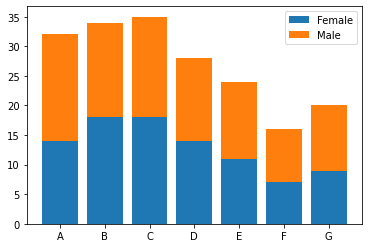

In [171]:
#各班各性别数据获取
Data_male = Data4.loc[Data4['Sex'] == 'M'].groupby('Class')['Class'].count()
Data_female = Data4.loc[Data4['Sex'] == 'F'].groupby('Class')['Class'].count()
#绘图
plt.bar(Data_female.index,Data_female.values,tick_label=['A','B','C','D','E','F','G'],label='Female')
plt.bar(Data_male.index,Data_male.values,tick_label=['A','B','C','D','E','F','G'],bottom=Data_female.values,label='Male')
plt.legend()
plt.show()

## 实验七：数据分析与可视化 II
请在一张图表中分别绘制学生代码为A13和A15的学生每次语文考试成绩走势折线图。

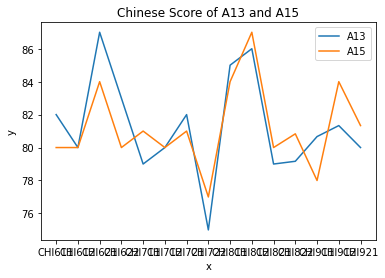

In [172]:
#分别获取两位同学语文成绩
Data_A13 = Data4.loc[(Data4['StuId']=='A13')]
Data_A15 = Data4.loc[(Data4['StuId']=='A15')]
A = []
for i in range(len(Data_A13.columns)):
    if (len(Data_A13.columns[i])>=3):
        if (Data_A13.columns[i][0]=='C') & (Data_A13.columns[i][1]=='H') & (Data_A13.columns[i][2]=='I'):
            A.append(Data_A13.columns[i])
B = []
C = []
for i in range(len(A)):
    B.append(Data_A13[A[i]][12])
    C.append(Data_A15[A[i]][14])
#绘图
plt.plot(A,B,label='A13')
plt.plot(A,C,label='A15')
plt.title('Chinese Score of A13 and A15')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 实验八：数据分析 III
请输出7年级第2学期期中考试中英语成绩小于60分或语文成绩小于60分的学生编号、班级、英语成绩、语文成绩。

In [173]:
#获取语文或英语不及格者的信息
Data_bujige = Data4.loc[(Data4['CHI721']<60)|(Data4['ENG721']<60)]
#删除无关信息
for column in Data_bujige:
    if (column!='id')&(column!='StuId')&(column!='Class')&(column!='CHI721')&(column!='ENG721'):
        Data_bujige=Data_bujige.drop(labels = column,axis = 1)
#打印
print(Data_bujige)

      id StuId Class  CHI721  ENG721
57    58   B17     B    42.0    30.0
121  122   D02     D    75.0    51.0
132  133   D13     D    73.0    54.0
147  148   D29     D    76.0    54.0
164  165   E14     E    64.0    47.0
172  173   E22     E    65.0    46.0
173  174   E23     E    68.0    54.0
176  177   E26     E    53.0    26.0
178  179   E28     E    48.0    36.0
179  180   E29     E    70.0    53.0
180  181   E30     E    48.0    34.0
181  182   E31     E    76.0    56.0
191  192   F09     F    67.0    36.0
192  193   F10     F    61.0    37.0
193  194   F11     F    50.0    34.0
200  201   F18     F    58.0    53.0
202  203   F20     F    56.0    82.0
204  205   F22     F    56.0    79.0
209  210   F27     F    72.0    53.0
220  221   G08     G    63.0    53.0
225  226   G13     G    67.0    41.0
226  227   G14     G    48.0    52.0
237  238   G25     G    77.0    44.0
238  239   G26     G    35.0    76.0
241  242   G29     G    59.0    60.0
242  243   G30     G    57.0    82.0


## 实验九：数据分析 IV
请输出A班和C班6年级第2学期期末考试中各个科目的均值和方差，然后用文字（程序注释）简要比较两个班级各科目的表现情况。

In [174]:
#获取两个班当次考试成绩
Data_A = Data4.loc[(Data4['Class']=='A')]
Data_C = Data4.loc[(Data4['Class']=='C')]
#删除无关信息
for column in Data_A:
    if (column!='CHI622')&(column!='MATH622')&(column!='ENG622'):
        Data_A=Data_A.drop(labels = column,axis = 1)
        Data_C=Data_C.drop(labels = column,axis = 1)
#汇总并打印
Data_AC = pd.DataFrame({'Class':['A','C'],'CHI_AVG':[Data_A['CHI622'].mean(),Data_C['CHI622'].mean()],'CHI_VAR':[Data_A['CHI622'].var(),Data_C['CHI622'].var()],'MATH_AVG':[Data_A['MATH622'].mean(),Data_C['MATH622'].mean()],'MATH_VAR':[Data_A['MATH622'].var(),Data_C['MATH622'].var()],'ENG_AVG':[Data_A['ENG622'].mean(),Data_C['ENG622'].mean()],'ENG_VAR':[Data_A['ENG622'].var(),Data_C['ENG622'].var()]})
print(Data_AC)

  Class    CHI_AVG    CHI_VAR  MATH_AVG   MATH_VAR    ENG_AVG    ENG_VAR
0     A  81.406250  28.700605     90.75  19.935484  89.968750  32.160282
1     C  76.971429  26.263866     89.20  71.694118  91.257143  37.608403


从上面的结果来看，在这次考试中，A班的语文均分更高，但同学与同学之间的差距更大；A班的数学均分更高且同学与同学之间的差距更小；C班的英语均分更高，但同学与同学之间的差距更大。

## 实验十：数据存储
将任务8产生的DataFrame对象生成CSV文件，文件名为task8.csv。

In [175]:
#将DataFrame保存为csv文件
Data_bujige.to_csv('task8.csv',index=0)
#测试是否保存成功
Test = pd.read_csv("task8.csv")
print(Test.head())

    id StuId Class  CHI721  ENG721
0   58   B17     B    42.0    30.0
1  122   D02     D    75.0    51.0
2  133   D13     D    73.0    54.0
3  148   D29     D    76.0    54.0
4  165   E14     E    64.0    47.0
